# Preparations

In [1]:
# Fetch packages.
from basico import *
import json
import matplotlib.pyplot as plt
import statistics
import timeit
import numpy

In [2]:
# Function for plotting benchmarking output.
def plot_benchmark(benchmarks,lengs):
    medians = list(1000*numpy.array(list(map(statistics.median, benchmarks))))
    plt.plot(lengs,medians,linewidth=4)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim([lengs[0],lengs[-1]])
    plt.ylim([0.001,1.2*numpy.max(medians)])    # Choice of ymin does skew how plot appears.

In [3]:
# Benchmarking functions.
def make_benchmark(n,leng,method):
    def benchmark_func():
        run_time_course(duration=leng, stepsize=10, method=method)
    return timeit.Timer(benchmark_func).repeat(repeat=n, number=1)

# Serialises a benchmarking output using JSON.
def serialize(benchmarks,lengs,filename):
    with open('../Benchmarking_results/Prototyping/%s.json'%(filename) , "w") as write:
        json.dump({"benchmarks": benchmarks, "medians": list(1000*numpy.array(list(map(statistics.median, benchmarks)))), "lengs": lengs.tolist()} , write)

In [4]:
# Benchmarking parameters
n = 10

# Benchmarks

### Multistate

In [5]:
# Load model.
load_model('../Data/multistate.xml');

CPU times: user 8.7 ms, sys: 92 µs, total: 8.79 ms
Wall time: 8.3 ms


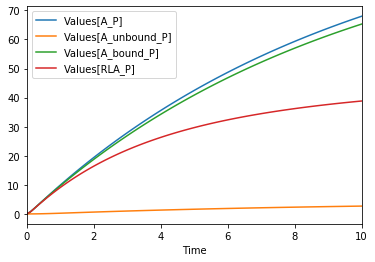

In [12]:
# Check ODE simulation output.
%time tc_multistate_ODE = run_time_course(duration = 10, method='deterministic')
tc_multistate_ODE.loc[:, ['Values[A_P]', 'Values[A_unbound_P]', 'Values[A_bound_P]', 'Values[RLA_P]']].plot()

CPU times: user 2.98 ms, sys: 0 ns, total: 2.98 ms
Wall time: 2.83 ms


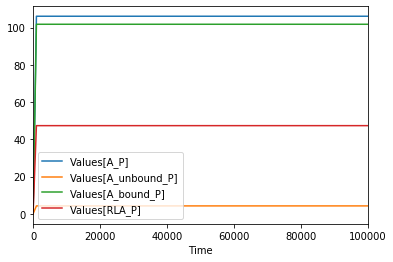

In [7]:
# Check ODE simulation output for maximum length simulation.
%time long_tc_multistate_ODE = run_time_course(duration = 100000, method='deterministic')
long_tc_multistate_ODE.loc[:, ['Values[A_P]', 'Values[A_unbound_P]', 'Values[A_bound_P]', 'Values[RLA_P]']].plot()

CPU times: user 18.9 ms, sys: 0 ns, total: 18.9 ms
Wall time: 18.6 ms


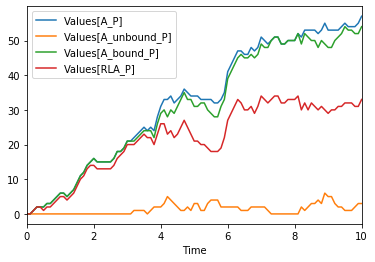

In [8]:
# Check Gillespie simulation output.
%time tc_multistate_Gillespie = run_time_course(duration = 10, method='directMethod')
tc_multistate_Gillespie.loc[:, ['Values[A_P]', 'Values[A_unbound_P]', 'Values[A_bound_P]', 'Values[RLA_P]']].plot()

CPU times: user 32.6 s, sys: 153 ms, total: 32.7 s
Wall time: 32.4 s


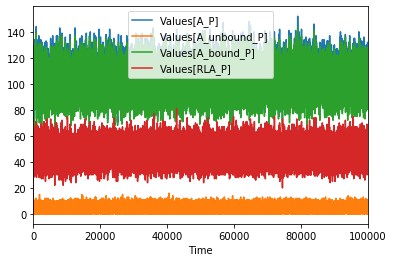

In [9]:
# Check Gillespie simulation output for maximum length simulation.
%time long_tc_multistate_Gillespie = run_time_course(duration = 100000, stepsize=1, method='directMethod')
long_tc_multistate_Gillespie.loc[:, ['Values[A_P]', 'Values[A_unbound_P]', 'Values[A_bound_P]', 'Values[RLA_P]']].plot()

In [10]:
# Load model (without observables).
load_model('../Data/multistate_no_obs.xml');

In [11]:
# Check ODE simulation time.
%time run_time_course(duration = 10, method='deterministic')
%time run_time_course(duration = 10, atuomatic=True, method='deterministic') # Supposedly setting "automatic=True" can improve/reduce performance in some cases.
1;

CPU times: user 2.34 ms, sys: 33 µs, total: 2.37 ms
Wall time: 2.24 ms
CPU times: user 2.37 ms, sys: 0 ns, total: 2.37 ms
Wall time: 2.07 ms


In [12]:
# Check Gillespie simulation time.
%time run_time_course(duration = 10, method='directMethod')
%time run_time_course(duration = 10, atuomatic=True, method='directMethod')
1;

CPU times: user 9.7 ms, sys: 24 µs, total: 9.72 ms
Wall time: 9.6 ms
CPU times: user 7.71 ms, sys: 0 ns, total: 7.71 ms
Wall time: 7.14 ms


In [13]:
# Benchmark ODE simulations.
lengs_multistate_ODE = numpy.logspace(1, 5, num=5)
multistate_ODE_benchmarks = [-1.0] * len(lengs_multistate_ODE)
for i in range(0,len(lengs_multistate_ODE)):
    %time multistate_ODE_benchmarks[i] = make_benchmark(n,lengs_multistate_ODE[i],'deterministic')
serialize(multistate_ODE_benchmarks,lengs_multistate_ODE,f'copasi_deterministic_multistate')

CPU times: user 14.3 ms, sys: 22 µs, total: 14.3 ms
Wall time: 13 ms
CPU times: user 15.3 ms, sys: 46 µs, total: 15.3 ms
Wall time: 13.8 ms
CPU times: user 22.2 ms, sys: 0 ns, total: 22.2 ms
Wall time: 20.8 ms
CPU times: user 72.4 ms, sys: 0 ns, total: 72.4 ms
Wall time: 72.1 ms
CPU times: user 589 ms, sys: 0 ns, total: 589 ms
Wall time: 587 ms


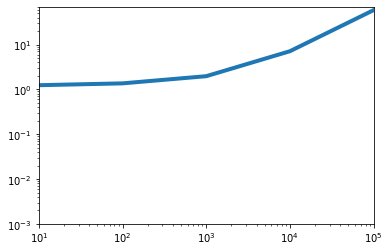

In [14]:
# Plot ODE Benchmarks.
plot_benchmark(multistate_ODE_benchmarks,lengs_multistate_ODE)

In [15]:
# Benchmark Gillespie simulations.
lengs_multistate_Gillespie = numpy.logspace(1, 5, num=5)
multistate_Gillespie_benchmarks = [-1.0] * len(lengs_multistate_Gillespie)
for i in range(0,len(lengs_multistate_Gillespie)):
    multistate_Gillespie_benchmarks[i] = make_benchmark(n,lengs_multistate_Gillespie[i],'directMethod')
serialize(multistate_Gillespie_benchmarks,lengs_multistate_Gillespie,f'copasi_directMethod_multistate')

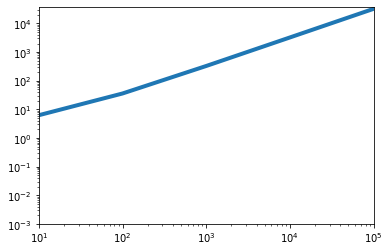

In [16]:
# Plot Gillespie Benchmarks.
plot_benchmark(multistate_Gillespie_benchmarks,lengs_multistate_Gillespie)

### Multisite2

In [17]:
# Load model.
load_model('../Data/multisite2.xml');

CPU times: user 21.5 ms, sys: 3.98 ms, total: 25.5 ms
Wall time: 25.3 ms


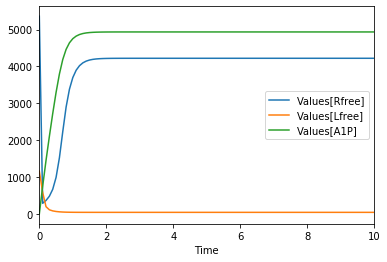

In [18]:
# Check ODE simulation output for maximum length simulation.
%time tc_multisite2_ODE = run_time_course(duration = 10, method='deterministic')
tc_multisite2_ODE.loc[:, ['Values[Rfree]','Values[Lfree]','Values[A1P]']].plot()

CPU times: user 29.2 ms, sys: 3 µs, total: 29.2 ms
Wall time: 28.7 ms


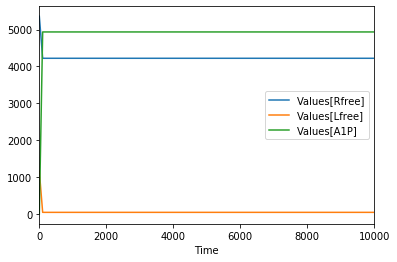

In [19]:
# Check ODE simulation output for maximum length simulation.
%time long_tc_multisite2_ODE = run_time_course(duration = 10000, method='deterministic')
long_tc_multisite2_ODE.loc[:, ['Values[Rfree]','Values[Lfree]','Values[A1P]']].plot()

CPU times: user 707 ms, sys: 5 µs, total: 707 ms
Wall time: 701 ms


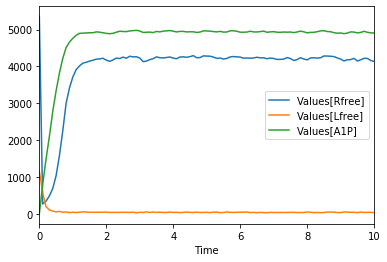

In [20]:
# Check Gillespie simulation output.
%time tc_multisite2_Gillespie = run_time_course(duration = 10, method='directMethod')
tc_multisite2_Gillespie.loc[:, ['Values[Rfree]','Values[Lfree]','Values[A1P]']].plot()

CPU times: user 8min 53s, sys: 2.22 s, total: 8min 55s
Wall time: 8min 49s


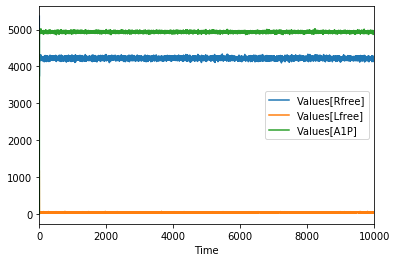

In [21]:
# Check Gillespie simulation output for maximum length simulation.
%time long_tc_multisite2_Gillespie = run_time_course(duration = 10000, stepsize=1, method='directMethod')
long_tc_multisite2_Gillespie.loc[:, ['Values[Rfree]','Values[Lfree]','Values[A1P]']].plot()

In [18]:
# Load model (without observables).
load_model('../Data/multisite2_no_obs.xml');

In [19]:
# Check ODE simulation time.
%time run_time_course(duration = 10, method='deterministic')
%time run_time_course(duration = 10, method='deterministic', automatic=True)
1;

CPU times: user 24.4 ms, sys: 0 ns, total: 24.4 ms
Wall time: 24.2 ms
CPU times: user 34 ms, sys: 8 ms, total: 42 ms
Wall time: 40.5 ms


In [20]:
# Check Gillespie simulation time.
%time run_time_course(duration = 10, method='directMethod')
%time run_time_course(duration = 10, method='directMethod', automatic=True)
1;

CPU times: user 12.4 s, sys: 713 ms, total: 13.1 s
Wall time: 13 s
CPU times: user 12.9 s, sys: 741 ms, total: 13.7 s
Wall time: 13.1 s


In [ ]:
# Benchmark ODE simulation.
lengs_multisite2_ODE = numpy.logspace(1, 4, num=4)
multisite2_ODE_benchmarks = [-1.0] * len(lengs_multisite2_ODE)
for i in range(0,len(lengs_multisite2_ODE)):
    multisite2_ODE_benchmarks[i] = make_benchmark(n,lengs_multisite2_ODE[i],'deterministic')
serialize(multisite2_ODE_benchmarks,lengs_multisite2_ODE,f'copasi_deterministic_multisite2')

In [ ]:
# Plot ODE Benchmarks
plot_benchmark(multisite2_ODE_benchmarks,lengs_multisite2_ODE)

In [ ]:
# Benchmark Gillespie simulation.
lengs_multisite2_Gillespie = numpy.logspace(1, 4, num=4)
multisite2_Gillespie_benchmarks = [-1.0] * len(lengs_multisite2_Gillespie)
for i in range(0,len(lengs_multisite2_Gillespie)):
    %time multisite2_Gillespie_benchmarks[i] = make_benchmark(n,lengs_multisite2_Gillespie[i],'directMethod')
serialize(multisite2_Gillespie_benchmarks,lengs_multisite2_Gillespie,f'copasi_directMethod_multisite2')

In [ ]:
# Plot Gillespie Benchmarks
plot_benchmark(multisite2_Gillespie_benchmarks,lengs_multisite2_Gillespie)

### Egfr_net

In [22]:
# Load model.
load_model('../Data/egfr_net.xml');

CPU times: user 930 ms, sys: 4.01 ms, total: 934 ms
Wall time: 929 ms


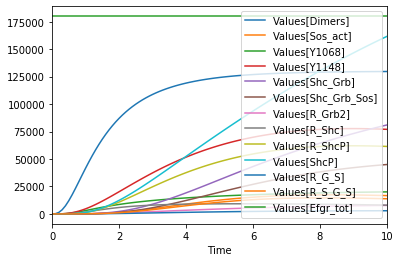

In [23]:
# Check ODE simulation output.
%time tc_egfr_net_ODE = run_time_course(duration = 10, method='deterministic')
tc_egfr_net_ODE.loc[:, ['Values[Dimers]','Values[Sos_act]','Values[Y1068]','Values[Y1148]','Values[Shc_Grb]','Values[Shc_Grb_Sos]','Values[R_Grb2]','Values[R_Shc]','Values[R_ShcP]','Values[ShcP]','Values[R_G_S]','Values[R_S_G_S]','Values[Efgr_tot]']].plot()

CPU times: user 7.52 s, sys: 40.2 ms, total: 7.56 s
Wall time: 7.46 s


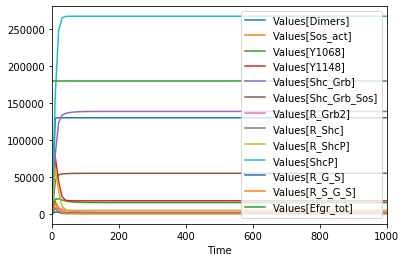

In [24]:
# Check ODE simulation output for maximum length simulation.
%time long_tc_egfr_net_ODE = run_time_course(duration = 1000, method='deterministic')
long_tc_egfr_net_ODE.loc[:, ['Values[Dimers]','Values[Sos_act]','Values[Y1068]','Values[Y1148]','Values[Shc_Grb]','Values[Shc_Grb_Sos]','Values[R_Grb2]','Values[R_Shc]','Values[R_ShcP]','Values[ShcP]','Values[R_G_S]','Values[R_S_G_S]','Values[Efgr_tot]']].plot()

CPU times: user 48 s, sys: 233 ms, total: 48.2 s
Wall time: 47.6 s


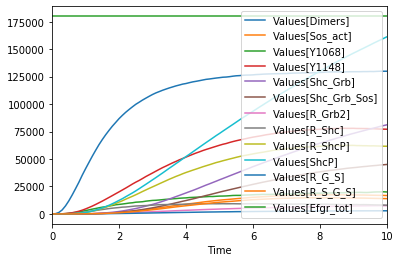

In [25]:
# Check Gillespie simulation output.
%time tc_egfr_net_Gillespie = run_time_course(duration = 10, method='directMethod')
tc_egfr_net_Gillespie.loc[:, ['Values[Dimers]','Values[Sos_act]','Values[Y1068]','Values[Y1148]','Values[Shc_Grb]','Values[Shc_Grb_Sos]','Values[R_Grb2]','Values[R_Shc]','Values[R_ShcP]','Values[ShcP]','Values[R_G_S]','Values[R_S_G_S]','Values[Efgr_tot]']].plot()

CPU times: user 44min 49s, sys: 12.8 s, total: 45min 2s
Wall time: 44min 33s


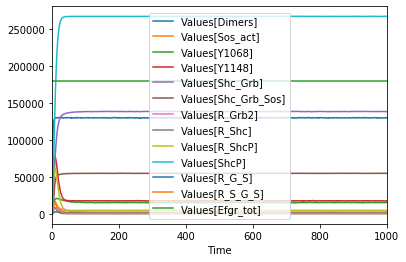

In [26]:
# Check Gillespie simulation output for maximum length simulation.
%time long_tc_egfr_net_Gillespie = run_time_course(duration = 1000, stepsize=1, method='directMethod')
long_tc_egfr_net_Gillespie.loc[:, ['Values[Dimers]','Values[Sos_act]','Values[Y1068]','Values[Y1148]','Values[Shc_Grb]','Values[Shc_Grb_Sos]','Values[R_Grb2]','Values[R_Shc]','Values[R_ShcP]','Values[ShcP]','Values[R_G_S]','Values[R_S_G_S]','Values[Efgr_tot]']].plot()

In [24]:
# Load model (without observables).
load_model('../Data/egfr_net_no_obs.xml');

In [25]:
# Check ODE simulation time.
%time run_time_course(duration = 10, method='deterministic')
%time run_time_course(duration = 10, automatic=True, method='deterministic')
1;

CPU times: user 927 ms, sys: 11 µs, total: 927 ms
Wall time: 925 ms
CPU times: user 1.04 s, sys: 4.02 ms, total: 1.05 s
Wall time: 1.04 s


In [26]:
# Check Gillespie simulation time.
%time run_time_course(duration = 10, method='directMethod')
%time run_time_course(duration = 10, automatic=True, method='directMethod')
1;

CPU times: user 35min 40s, sys: 5min 20s, total: 41min 1s
Wall time: 39min 52s
CPU times: user 36min 11s, sys: 5min 5s, total: 41min 16s
Wall time: 40min 44s


In [ ]:
# Benchmark ODE simulation.
lengs_egfr_net_ODE = numpy.logspace(1, 3, num=3)
egfr_net_ODE_benchmarks = [-1.0] * len(lengs_egfr_net_ODE)
for i in range(0,len(lengs_egfr_net_ODE)):
    egfr_net_ODE_benchmarks[i] = make_benchmark(n,lengs_egfr_net_ODE[i],'deterministic')
serialize(egfr_net_ODE_benchmarks,lengs_egfr_net_ODE,f'copasi_deterministic_egfr_net')

In [ ]:
# Plot ODE Benchmarks
plot_benchmark(egfr_net_ODE_benchmarks,lengs_egfr_net_ODE)

In [ ]:
# Benchmark Gillespie simulation.
lengs_egfr_net_Gillespie = numpy.logspace(1, 2, num=2)
egfr_net_Gillespie_benchmarks = [-1.0] * len(lengs_egfr_net_Gillespie)
for i in range(0,len(lengs_egfr_net_Gillespie)):
    egfr_net_Gillespie_benchmarks[i] = make_benchmark(n,lengs_egfr_net_Gillespie[i],'directMethod')
serialize(egfr_net_Gillespie_benchmarks,lengs_egfr_net_Gillespie,f'copasi_directMethod_egfr_net')

In [ ]:
# Plot Gillespie Benchmarks
plot_benchmark(egfr_net_Gillespie_benchmarks,lengs_egfr_net_Gillespie)

### BCR

In [27]:
# Load model.
load_model('../Data/BCR.xml');

CPU times: user 10min 44s, sys: 1.75 s, total: 10min 45s
Wall time: 10min 42s


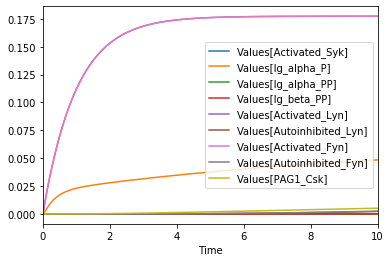

In [28]:
# Check ODE simulation output.
%time tc_BCR_ODE = run_time_course(duration = 10, method='deterministic')
tc_BCR_ODE.loc[:, ['Values[Activated_Syk]','Values[Ig_alpha_P]','Values[Ig_alpha_PP]','Values[Ig_beta_PP]','Values[Activated_Lyn]','Values[Autoinhibited_Lyn]','Values[Activated_Fyn]','Values[Autoinhibited_Fyn]','Values[PAG1_Csk]']].plot()

CPU times: user 12min 34s, sys: 2.36 s, total: 12min 36s
Wall time: 12min 30s


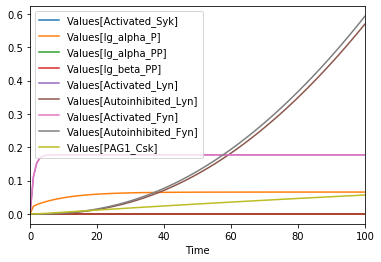

In [29]:
# Check ODE simulation output for maximum length simulation.
%time long_tc_BCR_ODE = run_time_course(duration = 100, method='deterministic')
long_tc_BCR_ODE.loc[:, ['Values[Activated_Syk]','Values[Ig_alpha_P]','Values[Ig_alpha_PP]','Values[Ig_beta_PP]','Values[Activated_Lyn]','Values[Autoinhibited_Lyn]','Values[Activated_Fyn]','Values[Autoinhibited_Fyn]','Values[PAG1_Csk]']].plot()

In [ ]:
### Gillespie simulations not performed using Copasi for the BCR model (too long simulation times required). ###
# Check Gillespie simulation output.
# %time tc_BCR_Gillespie = run_time_course(duration = 10, method='directMethod')
# tc_BCR_Gillespie.loc[:, ['Values[Activated_Syk]','Values[lg_alpha_P]','Values[lg_alpha_PP]','Values[lg_beta_PP]','Values[Activated_Lyn]','Values[Autoinhibited_Lyn]','Values[Activated_Fyn]','Values[Autoinhibited_Fyn]','Values[PAG1_Csk]']].plot()

In [ ]:
# Load model (without observables).
load_model('../Data/BCR_no_obs.xml');

In [ ]:
# Check ODE simulation time.
%time run_time_course(duration = 10, method='deterministic')
%time run_time_course(duration = 10, automatic=True, method='deterministic')
1;

In [ ]:
# Check Gillespie simulation time.
# %time run_time_course(duration = 10, method='directMethod')
# %time run_time_course(duration = 10, automatic=True, method='directMethod')
# 1;

In [ ]:
# Benchmark ODE simulation.
lengs_BCR_ODE = numpy.logspace(1, 2, num=2)
BCR_ODE_benchmarks = [-1.0] * len(lengs_BCR_ODE)
for i in range(0,len(lengs_BCR_ODE)):
    BCR_ODE_benchmarks[i] = make_benchmark(n,lengs_BCR_ODE[i],'deterministic')
serialize(BCR_ODE_benchmarks,lengs_BCR_ODE,f'copasi_deterministic_BCR')

In [ ]:
# Plot ODE Benchmarks
plot_benchmark(BCR_ODE_benchmarks,lengs_BCR_ODE)

In [ ]:
# Benchmark Gillespie simulation.
# lengs_BCR_Gillespie = numpy.logspace(1, 2, num=2)
# BCR_Gillespie_benchmarks = [-1.0] * len(lengs_BCR_Gillespie)
# for i in range(0,len(lengs_BCR_Gillespie)):
#     BCR_Gillespie_benchmarks[i] = make_benchmark(n,lengs_BCR_Gillespie[i],'directMethod')
# serialize(BCR_Gillespie_benchmarks,lengs_BCR_Gillespie,f'copasi_directMethod_BCR')

In [ ]:
# Plot Gillespie Benchmarks
# plot_benchmark(BCR_Gillespie_benchmarks,lengs_BCR_Gillespie)

### Fceri_gamma2

In [ ]:
# Load model.
load_model('../Data/fceri_gamma2.xml');

In [ ]:
# Check ODE simulation output.
%time tc_fceri_gamma2_ODE = run_time_course(duration = 10, method='deterministic')
tc_fceri_gamma2_ODE.loc[:, ['Values[Lyn_Free]','Values[RecMon]','Values[RecPbeta]','Values[RecPgamma]','Values[RecSyk]','Values[RecSykP5]']].plot()

In [ ]:
# Check ODE simulation output for maximum length simulation.
%time long_tc_fceri_gamma2_ODE = run_time_course(duration = 100, method='deterministic')
long_tc_fceri_gamma2_ODE.loc[:, ['Values[Lyn_Free]','Values[RecMon]','Values[RecPbeta]','Values[RecPgamma]','Values[RecSyk]','Values[RecSykP5]']].plot()

In [ ]:
# Check Gillespie simulation output.
%time tc_fceri_gamma2_Gillespie = run_time_course(duration = 10, method='directMethod')
tc_fceri_gamma2_Gillespie.loc[:, ['Values[Lyn_Free]','Values[RecMon]','Values[RecPbeta]','Values[RecPgamma]','Values[RecSyk]','Values[RecSykP5]']].plot()

In [ ]:
# Check Gillespie simulation output for maximum length simulation.
%time long_tc_fceri_gamma2_Gillespie = run_time_course(duration = 100, stepsize=1, method='directMethod')
long_tc_fceri_gamma2_Gillespie.loc[:, ['Values[Lyn_Free]','Values[RecMon]','Values[RecPbeta]','Values[RecPgamma]','Values[RecSyk]','Values[RecSykP5]']].plot()

In [ ]:
# Load model (without observables).
load_model('../Data/fceri_gamma2_no_obs.xml');

In [ ]:
# Check ODE simulation time.
%time run_time_course(duration = 10, method='deterministic')
%time run_time_course(duration = 10, automatic=True, method='deterministic')
1;

In [ ]:
# Check Gillespie simulation time.
%time run_time_course(duration = 10, method='directMethod')
%time run_time_course(duration = 10, automatic=True, method='directMethod')
1;

In [ ]:
# Benchmark ODE simulation.
lengs_fceri_gamma2_ODE = numpy.logspace(1, 2, num=2)
fceri_gamma2_ODE_benchmarks = [-1.0] * len(lengs_fceri_gamma2_ODE)
for i in range(0,len(lengs_fceri_gamma2_ODE)):
    fceri_gamma2_ODE_benchmarks[i] = make_benchmark(n,lengs_fceri_gamma2_ODE[i],'deterministic')
serialize(fceri_gamma2_ODE_benchmarks,lengs_fceri_gamma2_ODE,f'copasi_deterministic_fceri_gamma2')

In [ ]:
# Plot ODE Benchmarks
plot_benchmark(fceri_gamma2_ODE_benchmarks,lengs_fceri_gamma2_ODE)

In [ ]:
# Benchmark Gillespie simulation.
lengs_fceri_gamma2_Gillespie = numpy.logspace(1, 2, num=2)
fceri_gamma2_Gillespie_benchmarks = [-1.0] * len(lengs_fceri_gamma2_Gillespie)
for i in range(0,len(lengs_fceri_gamma2_Gillespie)):
    fceri_gamma2_Gillespie_benchmarks[i] = make_benchmark(n,lengs_fceri_gamma2_Gillespie[i],'directMethod')
serialize(fceri_gamma2_Gillespie_benchmarks,lengs_fceri_gamma2_Gillespie,f'copasi_directMethod_fceri_gamma2')

In [ ]:
# Plot Gillespie Benchmarks
plot_benchmark(fceri_gamma2_Gillespie_benchmarks,lengs_fceri_gamma2_Gillespie)